<hr style="height:2px;border:none"/>
<h1 align='center'> Desafío LATAM </h1>

<H4 align='center'> Félix Vergara </H3>

<hr style="height:2px;border:none"/>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Desafio LATAM/dataset_SCL.csv')

<ipython-input-3-558f604a89d1>:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/Desafio LATAM/dataset_SCL.csv')


In [4]:
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [5]:
df['Fecha-I'].unique().shape[0]

53252

In [6]:
df['Fecha-O'].unique().shape[0]

62774

# Distribución de datos

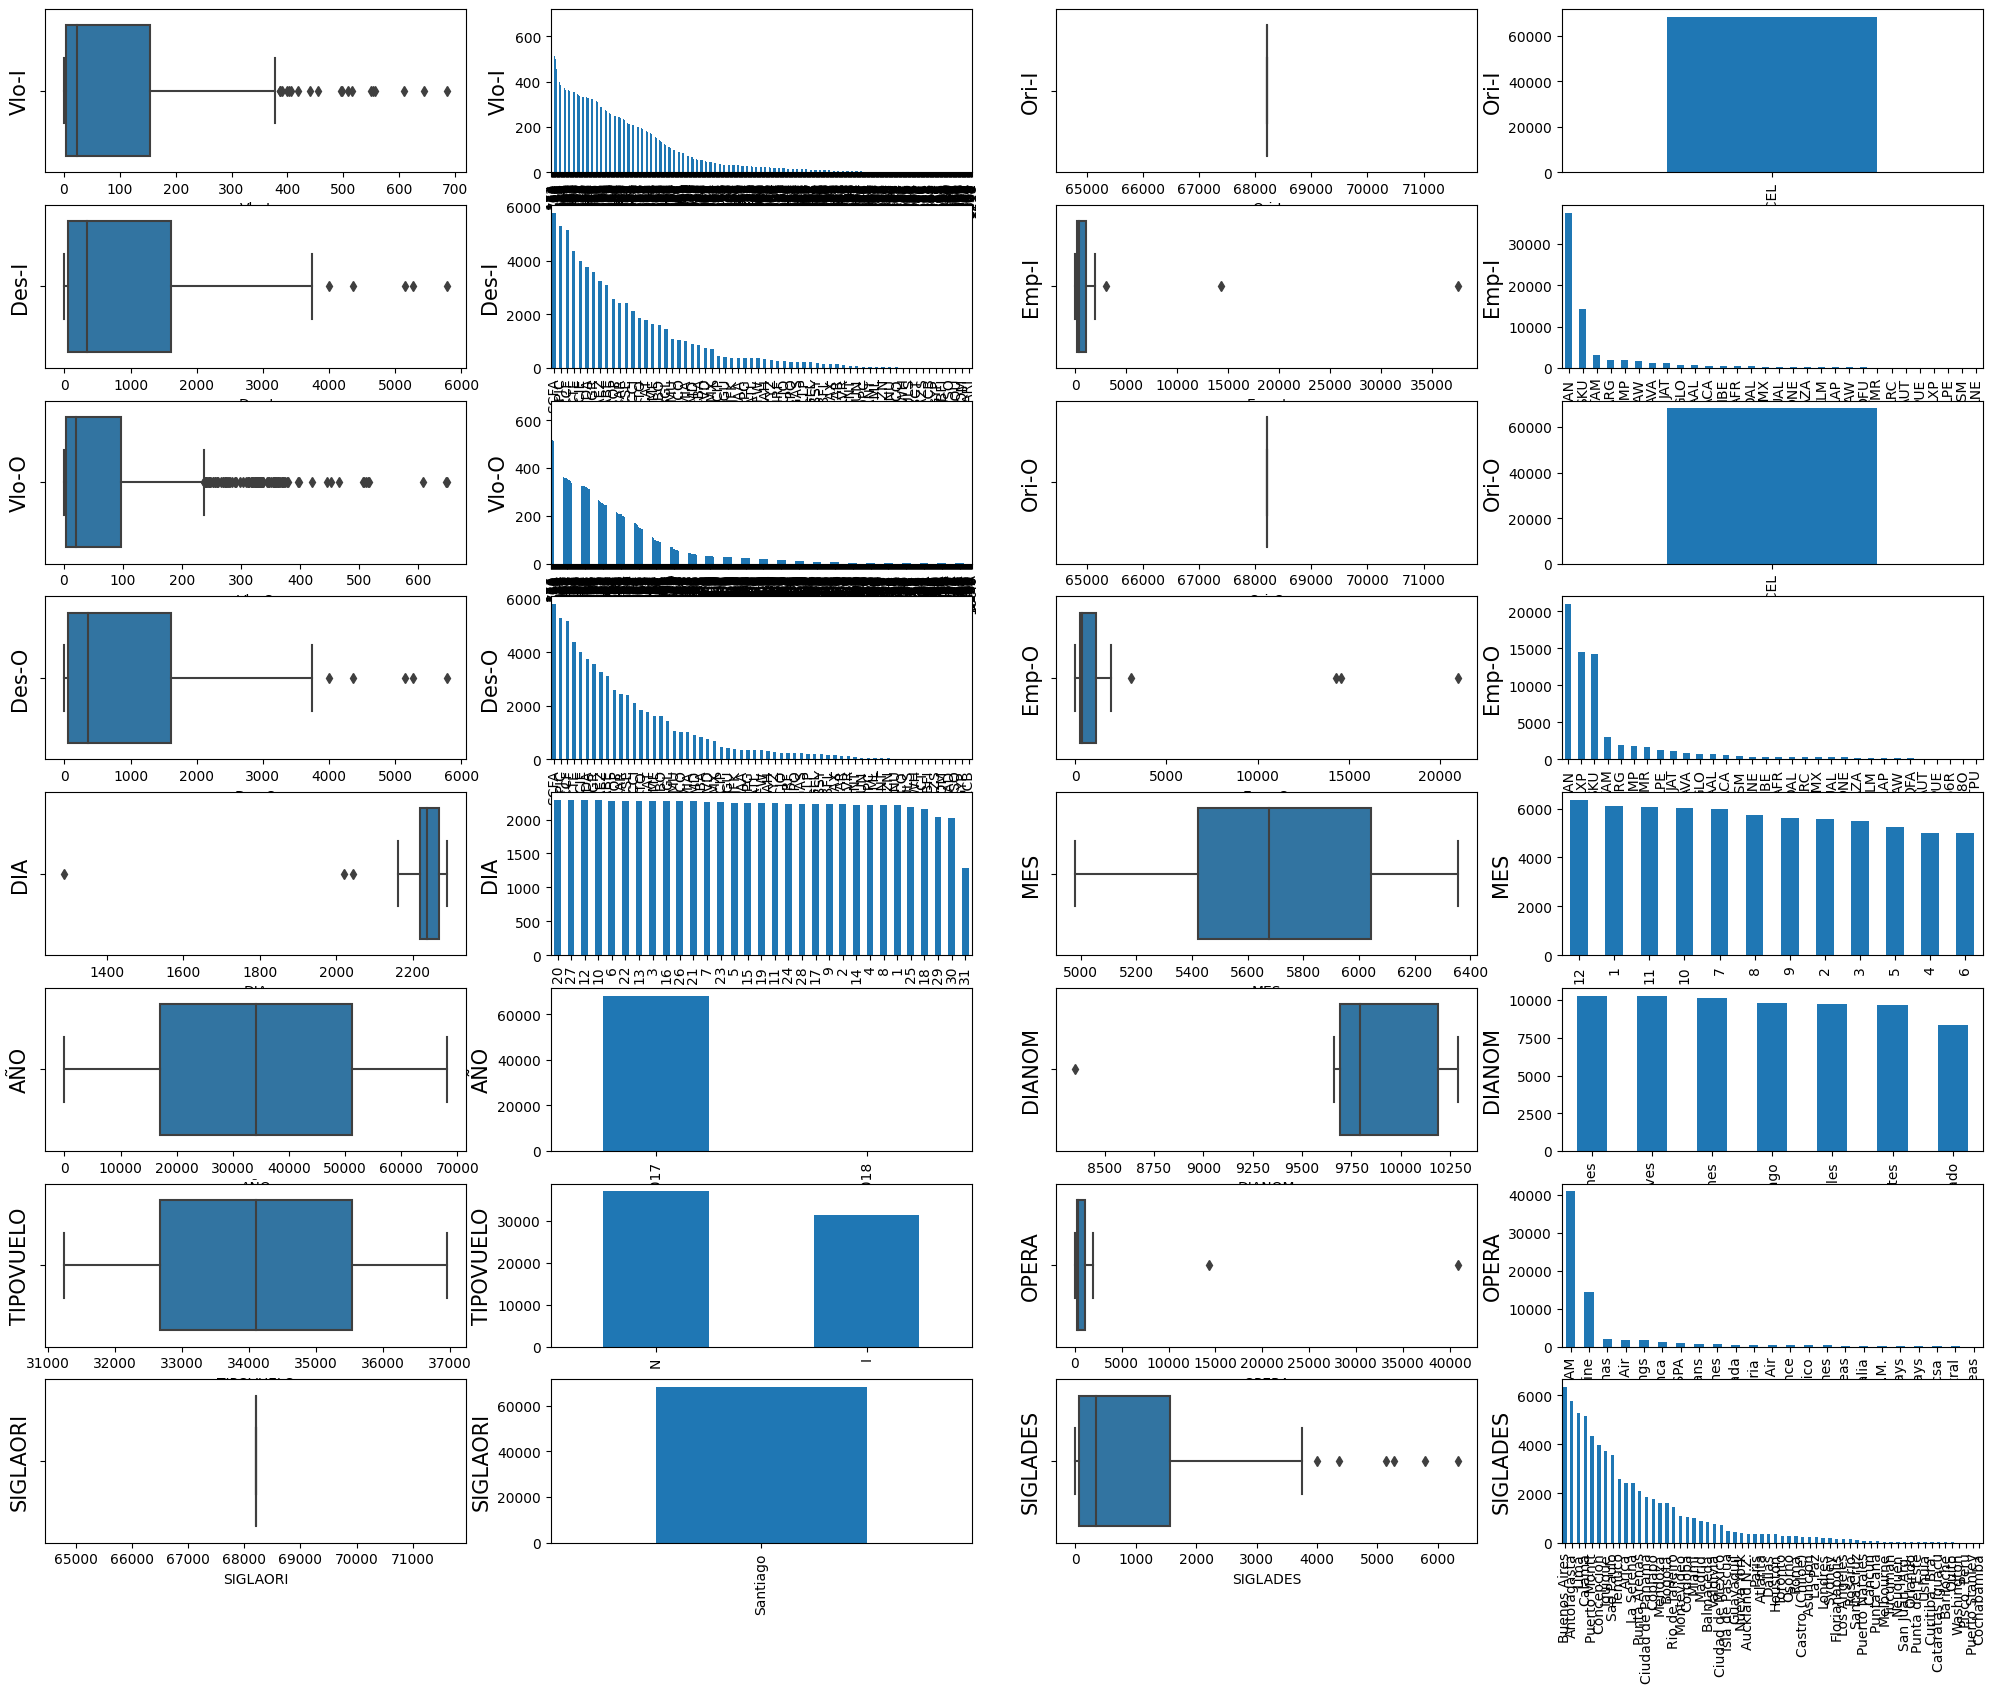

In [7]:
cont_vars = list(df.drop(columns=['Fecha-I','Fecha-O']).columns)
def outliers_visual(data):
    i = 0
    plt.figure(figsize=(25, 25))
    for col in cont_vars:
        i += 1
        plt.subplot(int(df.shape[1]/4)*2+2, 4, i)
        sns.boxplot(x=df[col].value_counts())
        plt.ylabel(col,fontsize=15)
        i += 1
        plt.subplot(int(df.shape[1]/4)*2+2, 4, i)
        df[col].value_counts().plot(kind='bar')
        plt.ylabel(col,fontsize=15)
    plt.show()
outliers_visual(df)

Como podemos observar hay variables no normales dentro de los datos, por lo tanto ejecutaremos un test con las distribuciones más comunes para poder concluir que distribución tiene cada variable

In [8]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "lognorm", "chi", "gamma", "t", "bernoulli"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        try:
          param = dist.fit(data)
        except:
          pass
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        try:
          D, p = st.kstest(data, dist_name, args=param)
        except:
          D, p = st.chisquare(data)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [9]:
lista_distribucion=[]
for columna in df.drop(columns=['Fecha-I','Fecha-O']).columns:
  columna_distribucion=pd.Series(df[columna].value_counts())
  lista_distribucion.append(get_best_distribution(columna_distribucion))

p value for norm = 2.7312994399315994e-48
p value for lognorm = 6.772060298537835e-130
p value for chi = 2.1949446428996084e-18
p value for gamma = 2.1933462076648823e-18
p value for t = 3.388921568314597e-102
p value for bernoulli = 0.0
Best fitting distribution: chi
Best p value: 2.1949446428996084e-18
Parameters for the best fit: (0.32367060157649796, 0.9999999999999998, 213.0086713725011)
p value for norm = nan
p value for lognorm = 0.04544546156886908
p value for chi = 0.6277776021653181
p value for gamma = 0.7305566487703041


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:5585: RuntimeWarning: invalid value encountered in log
  lambda x, s: -np.log(x)**2 / (2*s**2) - np.log(s*x*np.sqrt(2*np.pi)),
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:407: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


p value for t = 0.7969322009486737
p value for bernoulli = nan
Best fitting distribution: norm
Best p value: nan
Parameters for the best fit: (68206.0, 0.0)
p value for norm = 0.00013292269591661183
p value for lognorm = 6.019078841240487e-11
p value for chi = 0.18274143182463531
p value for gamma = 0.22386729298213104
p value for t = 4.395852632390387e-06
p value for bernoulli = 0.0
Best fitting distribution: gamma
Best p value: 0.22386729298213104
Parameters for the best fit: (0.39062722268491323, 0.9999999999999999, 1821.0109007767346)
p value for norm = 2.8424591597828886e-05
p value for lognorm = 0.2177211621514603
p value for chi = 0.0011018086017384743
p value for gamma = 0.00020879830972354366
p value for t = 0.058625789061459876
p value for bernoulli = 0.0
Best fitting distribution: lognorm
Best p value: 0.2177211621514603
Parameters for the best fit: (2.3837645878119407, 0.5574479263888544, 257.14469463332654)
p value for norm = 2.1370183472251453e-66
p value for lognorm = 2.

/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:5585: RuntimeWarning: invalid value encountered in log
  lambda x, s: -np.log(x)**2 / (2*s**2) - np.log(s*x*np.sqrt(2*np.pi)),


p value for lognorm = 0.04544546156886908
p value for chi = 0.6277776021653181
p value for gamma = 0.7305566487703041


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:407: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


p value for t = 0.7969322009486737
p value for bernoulli = nan
Best fitting distribution: norm
Best p value: nan
Parameters for the best fit: (68206.0, 0.0)
p value for norm = 0.000185382510139089
p value for lognorm = 1.966019199929454e-12
p value for chi = 0.33745384758521846
p value for gamma = 0.12484241532286333
p value for t = 8.140215543829667e-06
p value for bernoulli = 0.0
Best fitting distribution: chi
Best p value: 0.33745384758521846
Parameters for the best fit: (0.36986513344110816, 0.9999999999999998, 1998.8157197334472)
p value for norm = 6.638817618472996e-05
p value for lognorm = 0.3368696558797645
p value for chi = 0.10154218482973643
p value for gamma = 0.00047090732782284483
p value for t = 0.10906244160461864
p value for bernoulli = 0.0
Best fitting distribution: lognorm
Best p value: 0.3368696558797645
Parameters for the best fit: (1.7771722683183366, -4.296884858819681, 462.59334784313353)
p value for norm = 0.0004992906390486329
p value for lognorm = 1.456972895

/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:5585: RuntimeWarning: invalid value encountered in log
  lambda x, s: -np.log(x)**2 / (2*s**2) - np.log(s*x*np.sqrt(2*np.pi)),


p value for lognorm = 0.04544546156886908
p value for chi = 0.6277776021653181
p value for gamma = 0.7305566487703041


/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:407: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


p value for t = 0.7969322009486737
p value for bernoulli = nan
Best fitting distribution: norm
Best p value: nan
Parameters for the best fit: (68206.0, 0.0)
p value for norm = 0.00017325409717119738
p value for lognorm = 2.9455531453474426e-08
p value for chi = 0.29739299320620893
p value for gamma = 0.2283223477963261
p value for t = 1.1024716292149089e-05
p value for bernoulli = 0.0
Best fitting distribution: chi
Best p value: 0.29739299320620893
Parameters for the best fit: (0.2827071318640719, 0.9999999999999998, 2578.98615417365)


In [10]:
df_distribution=pd.DataFrame(lista_distribucion)

In [11]:
df_distribution.columns=['Distribution','p','params']

In [12]:
df_distribution['Variable'] = df.drop(columns=['Fecha-I','Fecha-O']).columns

In [13]:
df_distribution

,Distribution,p,params,Variable
0,chi,2.194945e-18,"(0.32367060157649796, 0.9999999999999998, 213....",Vlo-I
1,norm,NaN,"(68206.0, 0.0)",Ori-I
2,gamma,2.238673e-01,"(0.39062722268491323, 0.9999999999999999, 1821...",Des-I
3,lognorm,2.177212e-01,"(2.3837645878119407, 0.5574479263888544, 257.1...",Emp-I
4,chi,2.134844e-19,"(0.298100332357935, 0.9999999999999999, 214.00...",Vlo-O
5,norm,NaN,"(68206.0, 0.0)",Ori-O
6,chi,3.374538e-01,"(0.36986513344110816, 0.9999999999999998, 1998...",Des-O
7,lognorm,3.368697e-01,"(1.7771722683183366, -4.296884858819681, 462.5...",Emp-O
8,t,4.994530e-04,"(181819.57208631362, 2200.1969949468676, 176.8...",DIA
9,t,7.656503e-01,"(262703.84417199227, 5683.87826426076, 428.311...",MES


A partir de los test podemos concluir que si bien hay variables aleatorias que no son normales, el test arroja que lo son. Por lo que manualmente corregiremos las variables aleatorias que corresponden a otra distribución.

In [14]:
df_distribution['Distribution'] = df_distribution['Distribution'].replace('norm','bernoulli')

Finalmente obtenemos las distribuciones de cada variable con sus parámetros y p-valor

In [15]:
df_distribution

,Distribution,p,params,Variable
0,chi,2.194945e-18,"(0.32367060157649796, 0.9999999999999998, 213....",Vlo-I
1,bernoulli,NaN,"(68206.0, 0.0)",Ori-I
2,gamma,2.238673e-01,"(0.39062722268491323, 0.9999999999999999, 1821...",Des-I
3,lognorm,2.177212e-01,"(2.3837645878119407, 0.5574479263888544, 257.1...",Emp-I
4,chi,2.134844e-19,"(0.298100332357935, 0.9999999999999999, 214.00...",Vlo-O
5,bernoulli,NaN,"(68206.0, 0.0)",Ori-O
6,chi,3.374538e-01,"(0.36986513344110816, 0.9999999999999998, 1998...",Des-O
7,lognorm,3.368697e-01,"(1.7771722683183366, -4.296884858819681, 462.5...",Emp-O
8,t,4.994530e-04,"(181819.57208631362, 2200.1969949468676, 176.8...",DIA
9,t,7.656503e-01,"(262703.84417199227, 5683.87826426076, 428.311...",MES


Una idea importante para agregar es que en caso de que existan datos faltantes podríamos agregar la media de cada distribución pero en esta situación el conjunto de datos no tiene datos faltantes.

# Añadiendo columnas

In [16]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [20]:
from datetime import datetime

In [34]:
df['Fecha-I'] = df['Fecha-I'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [37]:
df['Fecha-O'] = df['Fecha-O'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [38]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [59]:
df_synthetic_features = pd.DataFrame()
dic_15 = datetime(2023, 12, 15, 0, 0, 0).strftime('%m-%d %H:%M:%S')
mar_03 = datetime(2023, 3, 3, 0, 0, 0).strftime('%m-%d %H:%M:%S')
jul_15 = datetime(2023, 7, 15, 0 ,0 ,0).strftime('%m-%d %H:%M:%S')
jul_31 = datetime(2023, 7, 31, 0, 0, 0).strftime('%m-%d %H:%M:%S')
sep_11 = datetime(2023, 9, 11, 0, 0, 0).strftime('%m-%d %H:%M:%S')
sep_30 = datetime(2023, 9, 30, 0, 0, 0).strftime('%m-%d %H:%M:%S')
df_synthetic_features['high_season'] = df['Fecha-I'].apply(lambda x: 
                                                           1 if (x.strftime('%m-%d %H:%M:%S')>=dic_15 and x.strftime('%m-%d %H:%M:%S')<=mar_03) or
                                                           (x.strftime('%m-%d %H:%M:%S')>= jul_15 and x.strftime('%m-%d %H:%M:%S')<=jul_31) or
                                                           (x.strftime('%m-%d %H:%M:%S')>= sep_11 and x.strftime('%m-%d %H:%M:%S')<=sep_30)
                                                           else 0)

In [71]:
df_synthetic_features['min_diff'] = df.apply(lambda x: int(x['Fecha-O'].strftime('%M'))-int(x['Fecha-I'].strftime('%M')),axis=1)

In [77]:
df_synthetic_features['delay_15'] = df_synthetic_features['min_diff'].apply(lambda x: 1 if x>15 else 0)

In [81]:
def classification_of_hour(x):
  if x.strftime('%H:%M')>=hour_5 and x.strftime('%H:%M')<=hour_11:
    return 'morning'
  elif x.strftime('%H:%M')>=hour_12 and x.strftime('%H:%M')<=hour_18:
    return 'afternoon'
  else:
    return 'night'

In [82]:
hour_5 = datetime(2023, 12, 15, 5, 0, 0).strftime('%H:%M')
hour_11 = datetime(2023, 12, 15, 11, 59, 0).strftime('%H:%M')
hour_12 = datetime(2023, 12, 15, 12, 0, 0).strftime('%H:%M')
hour_18 = datetime(2023, 12, 15, 18, 59, 0).strftime('%H:%M')
hour_19 = datetime(2023, 12, 15, 19, 0, 0).strftime('%H:%M')
hour_4 = datetime(2023, 12, 15, 4, 59, 0).strftime('%H:%M')
df_synthetic_features['period_day'] = df['Fecha-I'].apply(classification_of_hour)

In [83]:
df_synthetic_features

,high_season,min_diff,delay_15,period_day
0,0,3,0,night
1,0,9,0,night
2,0,9,0,night
3,0,3,0,night
4,0,-2,0,night
...,...,...,...,...
68201,0,-14,0,afternoon
68202,0,-44,0,afternoon
68203,0,-20,0,afternoon
68204,0,-47,0,afternoon


In [84]:
df_synthetic_features.to_csv('synthetic_features.csv',index=False)